# Evaluación de Modelos
Comparación de métricas, matriz de confusión y curva ROC.

✅ Métricas guardadas en ..\models\metrics

--- Reporte Naive Bayes ---
              precision    recall  f1-score   support

        Fake       0.96      0.72      0.82      4776
        True       0.83      0.98      0.90      6671

    accuracy                           0.87     11447
   macro avg       0.89      0.85      0.86     11447
weighted avg       0.88      0.87      0.87     11447


--- Reporte SVM ---
              precision    recall  f1-score   support

        Fake       0.93      0.87      0.90      4776
        True       0.91      0.95      0.93      6671

    accuracy                           0.92     11447
   macro avg       0.92      0.91      0.91     11447
weighted avg       0.92      0.92      0.92     11447



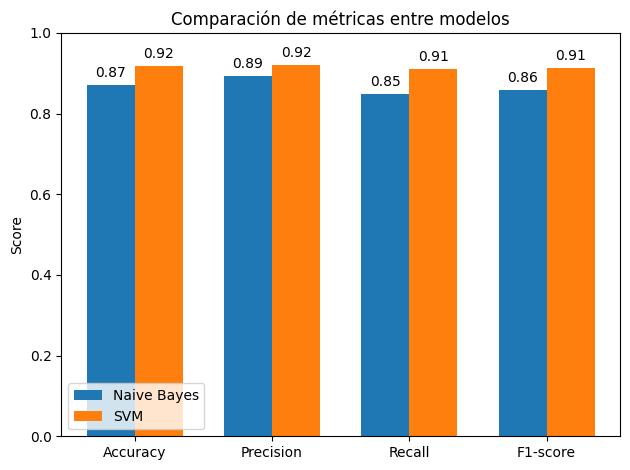

In [1]:
# 05_evaluacion.ipynb (corregido)

import os
import joblib
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Rutas
split_dir   = os.path.join("..", "data", "split")
model_dir   = os.path.join("..", "models")
metrics_dir = os.path.join(model_dir, "metrics")
os.makedirs(metrics_dir, exist_ok=True)

# Cargar datos vectorizados de prueba
X_train, y_train = joblib.load(os.path.join(split_dir, "train.pkl"))
X_test,  y_test  = joblib.load(os.path.join(split_dir, "test.pkl"))

# Cargar modelos
nb  = joblib.load(os.path.join(model_dir, "nb_model.pkl"))
svm = joblib.load(os.path.join(model_dir, "svm_model.pkl"))

# Función para calcular métricas
def calcular_metricas(modelo, X, y_true):
    y_pred = modelo.predict(X)
    return {
        "accuracy":  accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average="macro"),
        "recall":    recall_score(y_true, y_pred, average="macro"),
        "f1_score":  f1_score(y_true, y_pred, average="macro"),
        "confusion_matrix": confusion_matrix(y_true, y_pred).tolist()
    }

# Calcular métricas para ambos
metrics_nb  = calcular_metricas(nb,  X_test, y_test)
metrics_svm = calcular_metricas(svm, X_test, y_test)

# Guardar métricas en JSON
with open(os.path.join(metrics_dir, "nb_metrics.json"), "w") as f:
    json.dump(metrics_nb, f, indent=2)
with open(os.path.join(metrics_dir, "svm_metrics.json"), "w") as f:
    json.dump(metrics_svm, f, indent=2)

print("✅ Métricas guardadas en", metrics_dir)

# Mostrar reportes de clasificación
print("\n--- Reporte Naive Bayes ---")
print(classification_report(y_test, nb.predict(X_test), target_names=["Fake","True"]))

print("\n--- Reporte SVM ---")
print(classification_report(y_test, svm.predict(X_test), target_names=["Fake","True"]))

# Gráfica comparativa de métricas
# Mapa entre etiquetas legibles y claves en JSON
label_key_map = {
    "Accuracy":  "accuracy",
    "Precision": "precision",
    "Recall":    "recall",
    "F1-score":  "f1_score"
}

labels = list(label_key_map.keys())
nb_scores  = [metrics_nb[label_key_map[label]]  for label in labels]
svm_scores = [metrics_svm[label_key_map[label]] for label in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, nb_scores, width, label="Naive Bayes")
ax.bar(x + width/2, svm_scores, width, label="SVM")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,1)
ax.set_ylabel("Score")
ax.set_title("Comparación de métricas entre modelos")
ax.legend()

for idx, label in enumerate(labels):
    ax.text(idx - width/2, nb_scores[idx] + 0.02, f"{nb_scores[idx]:.2f}", ha="center")
    ax.text(idx + width/2, svm_scores[idx] + 0.02, f"{svm_scores[idx]:.2f}", ha="center")

plt.tight_layout()
plt.show()

